# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import os

# TODO: Fill this in based on where you saved the training and testing data
os.chdir('D:/Traffic-Sign-Classifier-Project/')

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

import numpy as np

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1:3]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = np.unique(y_train).shape[0]

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

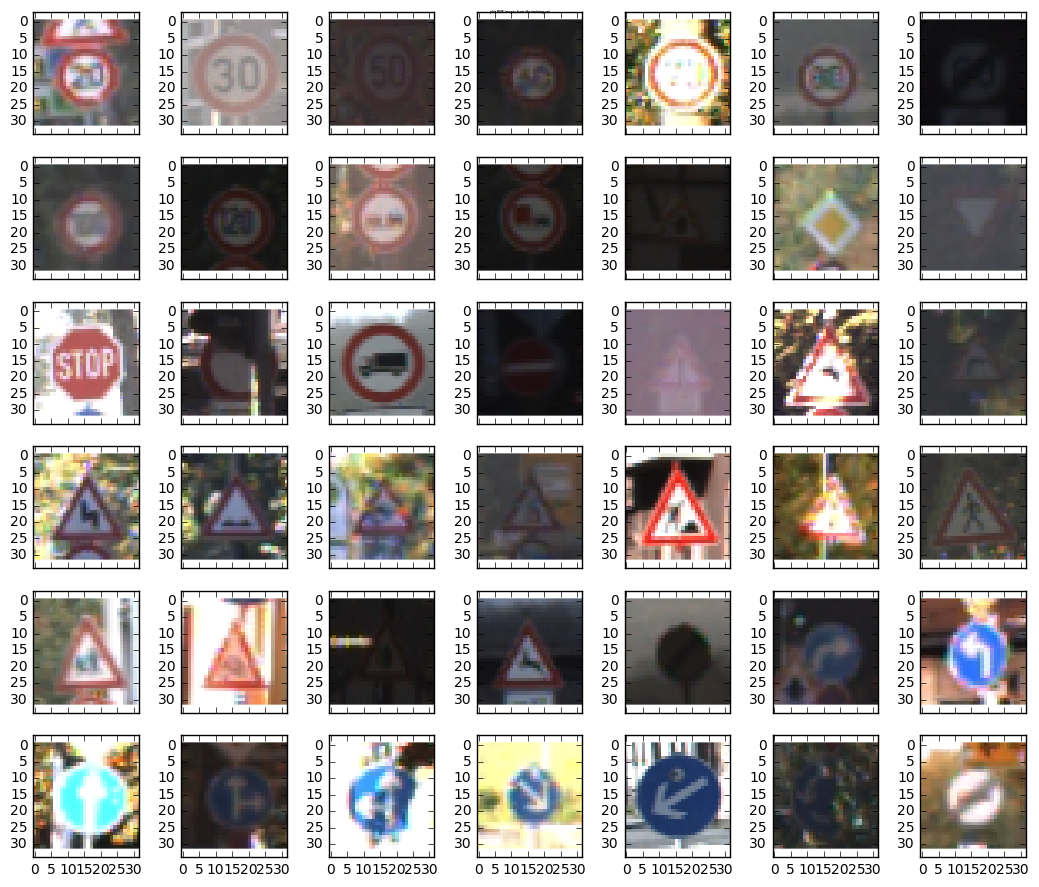

In [3]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

col_nbr = 7
row_nbr = 6

col_size = 1.5
row_size = 1.5

fig, ax = plt.subplots(row_nbr,col_nbr, sharex=True,  figsize=(col_nbr*col_size, row_nbr*row_size))
fig.suptitle('plot RGB images from the training set', fontsize=2, fontweight='bold')
ax = ax.flatten()
for i in range(42):
    img = X_train[y_train == i][0]
    ax[i].imshow(img, interpolation='nearest')
plt.tight_layout()

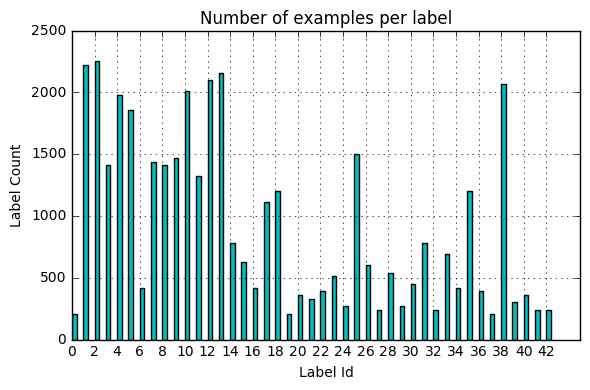

In [4]:
# Number of examples per label

fig, ax = plt.subplots()
bins = np.bincount(y_train)
ax.bar(range(n_classes),bins,.40, color='c')
plt.xlabel('Label Id')
plt.ylabel('Label Count')
plt.xticks(np.arange(0, n_classes, 2))
plt.title('Number of examples per label')
plt.tight_layout()
plt.grid(True)
plt.show()

In [5]:
# Read Signname from csv file
import pandas as pd
signnames = pd.read_csv('signnames.csv')
signnames.head()


,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)


----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [8]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

import cv2

def process_image(images):
    img_array = np.ndarray((images.shape[0], 32, 32, 1))
    for ind,img in enumerate(images):
        #Convert images to grayscale
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        #Apply histogram equalization with the function equalizeHist
        eqHist_img = cv2.equalizeHist(img_gray)
        reshape_img_gray = eqHist_img.reshape(32,32,1)  # reshaping 2-D array to 3-D array to accomodate channel
        img_array[ind] = reshape_img_gray
    return img_array

X_train = process_image(X_train)
X_test = process_image(X_test)

# print (X_train[0].shape)  # 32x32x3
# print (img_gray.shape)    # 32x32  when we convert RGB to gray,the grayscale store the value in 2-D array. 
# print (eqHist_img.shape)  # 32x32
# print (reshape_img_gray.shape) # 1x32x32x1

In [9]:
# Data Standardization

print ("Data prior to applying Standardization :", X_train[0].T)

def standardize_images(data):
    mean_data = np.mean(data)   
    std = np.std(data)
    data_array = np.asarray(data)
    standardized_data = (data_array - mean_data) / std 
    return standardized_data

X_train = standardize_images(X_train)
X_test = standardize_images(X_test)

print ("Data after applying Standardization :", X_train[0].T)

Data prior to applying Standardization : [[[  17.   36.   25. ...,  169.   81.   42.]
  [  12.   29.   38. ...,  157.   91.   98.]
  [  38.   42.   60. ...,  142.   52.   25.]
  ..., 
  [   6.   14.    6. ...,   78.  104.   95.]
  [   0.   12.    7. ...,   95.  121.   88.]
  [   0.   17.   14. ...,  101.   98.   78.]]]
Data after applying Standardization : [[[-1.55223514 -1.29510289 -1.44396893 ...,  0.5048229  -0.68610544
   -1.21390323]
  [-1.61990153 -1.38983583 -1.26803634 ...,  0.34242358 -0.55077267
   -0.45603974]
  [-1.26803634 -1.21390323 -0.97030425 ...,  0.13942443 -1.07857046
   -1.44396893]
  ..., 
  [-1.70110119 -1.59283497 -1.70110119 ..., -0.72670527 -0.37484008
   -0.49663957]
  [-1.78230085 -1.61990153 -1.68756791 ..., -0.49663957 -0.14477437
   -0.5913725 ]
  [-1.78230085 -1.55223514 -1.59283497 ..., -0.41543991 -0.45603974
   -0.72670527]]]


### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

I converted all images to grayscale to make edges more distinguishable and also to get computational efficiency in subsequent operations.I also performed histogram equalization on the resulting grayscaled image to equalize the most frequent intensity values so as to get better contrast enhancement.I standardized data by subtracting mean from image array then dividing by its standard deviation.By subtracting mean, we are eliminating the influence of mean as large mean value can cause accuracy loss.

In [ ]:
### Generate data additional data (OPTIONAL!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The dataset appears imbalanced across the labels.For examaple,'label 5' has 1800,'lable 6' has 400 and 'label 32' has 800 examples.So I have chosen to use train and test split technique in a stratified fashion in an attempt to deal this imbalanced class distibution.

I have split the original training dataset into 67% training dataset to train the model and to evaluate and perform validation accuracy against 33% validation dataset.I have used a seed value of 7 for the purpose of reproductibily of that split so that it doesnt effect evaluation outcome while I tune other hyperparameters.I have also shuffled the training data set.

The traffic signs examples are not uniformly distributed across class labels.Generating addional data may help make the model train better and subsequently in gaining a better test accuracy.My preprocessing steps do not include data augmentation at this stage.


In [10]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

from sklearn.cross_validation import train_test_split

seed = 7
X_train, X_validation,y_train,y_validation = train_test_split(X_train, y_train, test_size=0.33, random_state=seed, stratify=y_train)

print(y_train[0:200])

[ 8 22  1  1 18 22 18 13 25  4  5  3  8  8  3 15  0 12 12 31  4  7  8 38 13
 38  3 18  9 28 25 13 25  3 17 11  8 17 20 17 33  2 33 35 10 31  8 13 28  3
 28  0 13 26 38 10 18 18 10  3 38 10  1 13 11 18 15  4  9 19  3 31 23 25  2
  4 31  4 14  1  4  5 31 18  2 12 14 28 18 10 10 38 19  2 12 35  3  3 18 12
 28  7 18  7  5 21 25 38  1 38 35  2 13  8  1 26 12 11 28 22  4 15 26  2 11
 25 31 24 19 12  4 22 18 25  1  5  3  1 16  1  3 31  5  7  4  5  0 12 34 29
 17  5  4 18 13 10 18 13 18 35 12  5  5 27  4  1 38  1 12 23  2  8  5  7  4
  4 34  8 15  1 16 13 14  2 38 38  6 35 26 17  2 17 12 21 29  4  9 31 13 28]


In [11]:
# Shuffle the training data

from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train)

print(y_train[0:200])

[13  8  8  5  5 14  5 38 15 38 21 13 12 18 18  3 12 23 17  5 34 13 38 38 38
 42  5 13 35 36  7  3 13  7 17 35 38 32 10 34  2 17  6 31 33 31 11 25 13  7
 22 39  2 13  4 41  5  4 14 35  5 38 13 36  5  8 41 35  2 10 28  8 14 40 12
  8  6  9 13 12  8  1  4 17 11  1 23 29  6 42 21  1 38  1 15 21  2 12  4  7
  7 17 40 38 11 32 12 11  1  1 14 38 12  2  4  3  9 35 11  7  7 18  2  1  9
  5 12 35  8  1 30 10 10  8  3 39  2 18  3 40 13 10 25  4  2 13 20  1 25 33
  7  9  2 22 12 39  1  4  3 13 31  7 35 21 38  5 38 18 31  9  5  4 26 38 17
 30 12 38 38 10 23  8 36  8  6  9 17 23  6  1 18 36 11 13  9 13  5 10 13 23]


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

My final architecture implemets the LeNet-5 architecture,a pioneering convolutional network by Yann LeCun.LeNet-5 is desgined to work on small fixed size input and takes 32x32 input data.Since our traffic sign images are 32x32x3 pixels,the LeNet-5 soultion will be a good fit for this classification problem.

My implementation slighly differs from the original boilerplate solution as I have used tuned hyper parameters,optimizer,regularisation and feaure maps that I have found work better for this given problem in the environement where I performed the experimeation and tested my model.

The input is going to be a 4-D tensor input - the number of samples,number of color channels,width(32) and height(32).Kernal is also 4-D convolutional filter - feature maps x number of color channels x width x height. 

The architecture includes convolutional layers followed by a RELU activation and max pooling layer which is used to reduce the size of features.This structure is repeated twice.Then I flatten the features into a vector and put them into fully connected layers that are stacked at the output end.I have used dropout to prevent overfitting only during training between fully connected layers.The output here that we get is a set of 'logits'.We convert the outputs to a probability distribution using the softmax function.The softmax normalizes the unscaled logit outputs.


Below summarizes the final network architecture that I have used in the model.

**Layer 1: Convolutional.** 

1. The first Convolutional layer takes original image as input.It applies 5x5 kernal,stride of length 1,depth of 6 with VALID padding.This result in a feature map of 28x28x6 output values.
2. Activation layer uses RELU activation function.
3. Pooling layer taking the max over 2x2 patches.This result in output shape of 14x14x6.

**Layer 2: Convolutional.**

4. The input is 14x14x6 that resulted from the first Convolutional layer's max pooling operation. This layer applies 5x5 filter,stride of length 1,a depth of 32 with VAILD padding.This result in a feature map of 10x10x32. 
5. Activation layer uses RELU activation function.
6. Pooling layer taking the max over 2x2 patches.This result in output shape of 5x5x32.
7. Flatten layer flattens the inputs to 2D (batches,length) to be used by fully connected layers.The batch size is ignored here as it remains unaltered.After multiplying the output shape of max pooling layer 5x5x32 results 800 neurons.

**Layer 3: Fully Connected.**

8. Fully connected layer with 800 neurons with RELU activation 
9. Dropout layer with dropout probaility 0.5

**Layer 4: Fully Connected.**

10. Fully connected layer with 400 neurons with rectifier activation.
11. Dropout layer with dropout probaility 0.5

**Layer 5: Fully Connected (Logits).**

12. Fully connected layer with 120 neurons and rectifier activation.

**Output :**

13. This should have 43 outputs.


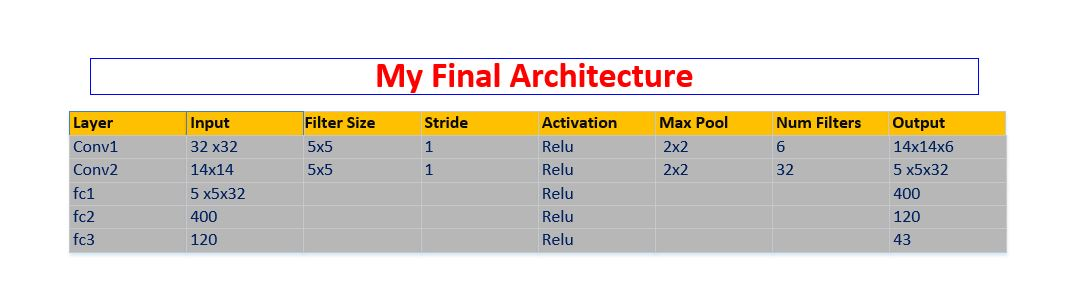

In [6]:
# from IPython.display import Image
# Image(filename = 'My Final Architecture.jpg',width=800) 

In [14]:
### Train your model here.
### Feel free to use as many code cells as needed.

import tensorflow as tf
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0    #1e-4
    sigma = 1e-2 #0.1 #3e-5  this is tuned to get a very small variance

    def var_weight(shape):
        initial = tf.truncated_normal(shape,mean=mu,stddev=sigma)  
        return tf.Variable(initial)

    def var_bias(shape):
        initial = tf.constant(0.1,shape=shape)
        return tf.Variable(initial)

    # Convolutional Layers

    # SOLUTION: Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = var_weight(shape=(5, 5, 1, 6))
    conv1_b = var_bias([6]) 
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    
    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    
    # SOLUTION: Layer 2: Convolutional. Output = 10x10x32.
    conv2_W = var_weight(shape=(5, 5, 6, 32))
    conv2_b = var_bias([32]) 
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    
    # SOLUTION: Pooling. Input = 10x10x32. Output = 5x5x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x32. Output = 800.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 800. Output = 400.
    fc1_W = var_weight(shape=(800, 400))                              
    fc1_b = var_bias([400]) 
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1) 
    
    # SOLUTION : Dropout 
    fc1 = tf.nn.dropout(fc1,.50)

    # SOLUTION: Layer 4: Fully Connected. Input = 400. Output = 120.
    fc2_W  = var_weight(shape=(400,120))                            
    fc2_b  = var_bias([120]) 
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    
    # SOLUTION : Dropout
    fc2 = tf.nn.dropout(fc2,.50) #dropout_keep_Prob .50
    
    # SOLUTION: Layer 5: Fully Connected. Input = 120. Output = 43.
    fc3_W  = var_weight(shape=(120, 43))
    fc3_b  = var_bias([43]) 
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

I have optimized the model with Momentum Optimizer.I have chosen tf.train.exponential_decay function for learning rate as that controls the decay rate.I also evaluated the model with the adam optimizer but noticed a better result with momentum optimizer.

For weights,I have used normal distribution function that truncates distribution from being too extreme by binding the value between truncation range.I tried letting the moded trianed with very low inititializing value of mean 1e-4 and Standard deviation of 3e-5,after running the model with a batch size of 128 for 70 epochs,the validation accuracy was found 94.8% and test accuracy 88.8%. Whereas with a much lower epochs run,I was able to get a better validaiton accuracy of 96.6% and test accuracy of 90.9% with a mean 0(zero) and standard deviation 1e-2 range. So I have chosen the mean 0 and standard deviation 1e-2 for weight initialisation. 

I have used the softmax crossentropy loss function to evaluate the weights.This function searches through different weights for the network.

As this is a multiclass classification problem,I used one hot encoding of the class values.It transformed the vector of class integers into a binary matrix.
I have trained the network for 80 epochs and validated against 33% of the training data. 

In [15]:
EPOCHS = 80
BATCH_SIZE = 128

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)
keep_prob = tf.placeholder(tf.float32) 

# learning_rate = 0.001 # 1e-3

batch = tf.Variable(0)
# Decay once per epoch, using an exponential schedule starting at 0.01.
learning_rate = tf.train.exponential_decay(
  0.01,                # Base learning rate.
  batch * BATCH_SIZE,  # Current index into the dataset.
  n_train,             # train_size : Decay step.
  0.95,                # Decay rate.
  staircase=True)


# Training operation includes logits plus softmax cross entropy loss
logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
# optimizer = tf.train.AdamOptimizer(learning_rate = learning_rate)
# training_operation = optimizer.minimize(loss_operation)
# momentum for the optimization.
training_operation = tf.train.MomentumOptimizer(learning_rate,0.9).minimize(loss_operation,global_step=batch)


### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

Since the LeNet-5 works well on 32x32 input data, and our traffic sign datasets contains 32x32x3 image data,I decieded to implement this well known solution as I found it is a plug and play solution with minor tweak require for hyperparameters.

While training the model,first,I evaluated my model against the subsets of training data which is known as the validation datasets that I created during preprocesisng steps.This was done to make sure to check if the model was overfitting by looking at the resulted accuracy metric from the trained and validation datasets.After that, I performed the evalution of my model on the actual test dataset.

As this is a classification problem,I let the model run and report classification accuracy as the metric.
I let the model trained with backpropagation based optimization algorithms for 40~80 epochs.I noticed the validation accuracy increase with an increase in number of epochs, but the rate of improvement was very small.I tuned the hyperparameters.I captured the results in a log and tuned the parameters as I was training with different hyperparameters values and worked on improved version of the model.At the end I chose a model and values for hyperparameters that I found gave the best results in the the environement where I performed the tests.After 70 epochs,I got a validation accuracy of 97.1% and a test accuracy of 91.0%. Then I increased the number of epochs to 80, and found a slight improvement of the validation accuracy to 97.5% and test accuracy to 91.7%.I didn't want to overtrain the model which can cause overfitting issue so I stopped training the model further.

# Model Evaluation

Evaluate how well the loss and accuracy of the model for a given dataset.

In [16]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

Train the Model

Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

In [17]:
saver = tf.train.Saver()
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            # Run optimization operation (backprop)
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
    save_path = saver.save(sess,"./lenet")
    print("Model saved in file: %s" % save_path)


Training...

EPOCH 1 ...
Validation Accuracy = 0.054

EPOCH 2 ...
Validation Accuracy = 0.054

EPOCH 3 ...
Validation Accuracy = 0.057

EPOCH 4 ...
Validation Accuracy = 0.243

EPOCH 5 ...
Validation Accuracy = 0.494

EPOCH 6 ...
Validation Accuracy = 0.634

EPOCH 7 ...
Validation Accuracy = 0.723

EPOCH 8 ...
Validation Accuracy = 0.797

EPOCH 9 ...
Validation Accuracy = 0.826

EPOCH 10 ...
Validation Accuracy = 0.849

EPOCH 11 ...
Validation Accuracy = 0.874

EPOCH 12 ...
Validation Accuracy = 0.889

EPOCH 13 ...
Validation Accuracy = 0.910

EPOCH 14 ...
Validation Accuracy = 0.917

EPOCH 15 ...
Validation Accuracy = 0.920

EPOCH 16 ...
Validation Accuracy = 0.924

EPOCH 17 ...
Validation Accuracy = 0.935

EPOCH 18 ...
Validation Accuracy = 0.932

EPOCH 19 ...
Validation Accuracy = 0.940

EPOCH 20 ...
Validation Accuracy = 0.946

EPOCH 21 ...
Validation Accuracy = 0.946

EPOCH 22 ...
Validation Accuracy = 0.949

EPOCH 23 ...
Validation Accuracy = 0.950

EPOCH 24 ...
Validation Accura

# Evaluate the Model

Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.


In [18]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.917


---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

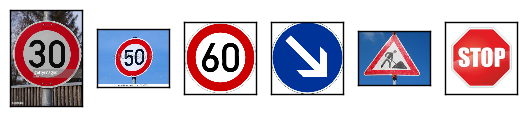

web_img_shape :  (6, 32, 32, 3)
transformed_web_img_shape :  (6, 32, 32, 1)
Model restored
Predicted labels : [ 4  2 40 38 21 14]
Actual labels (Hard-Coded Mapped) : [ 1  2  3 38 25 14]
Accuracy on the web images = 0.500


In [19]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

images = os.listdir("web_images/")
fig = plt.figure(figsize=(20, 8))

web_images = [] 

for idx,img in enumerate(images):
    image = mpimg.imread('web_images/' + images[idx])
    web_images.append(image)

# Create subplots in figure
for i in range(1,len(web_images)+1):
    img = fig.add_subplot(1,18,i)
    plt.imshow(web_images[i-1])
    img.set_xticks([])
    img.set_yticks([])
plt.show()

# convert to RGB and resize to add channel dimension
rgb_imgs = [cv2.cvtColor(img, cv2.COLOR_BGR2RGB) for img in web_images]
resize_dim = [cv2.resize(img, (32, 32)) for img in rgb_imgs]
web_imgs = np.array(resize_dim)

web_img_shape = web_imgs.shape
print ('web_img_shape : ',web_img_shape)

# convrt to gray and perform histogram equalization
X_web_train = process_image(web_imgs)

# standardize images
X_test_train = standardize_images(X_web_train)

# Hard Coded label id by looking up the sign name from the csv file
new_labels = np.array([1,2,3,38,25,14])  
images,labels = ([X_web_train, new_labels])
X_web, y_web = images, labels 

# print (new_X_test, new_y_test)
print ('transformed_web_img_shape : ', X_web.shape)


with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    print("Model restored")
    predictions = sess.run(logits, feed_dict={x: X_web})  
    labels = np.argmax(predictions, axis=1)
    softmax_probabilities = sess.run(tf.nn.top_k(tf.nn.softmax(predictions), k=3), feed_dict={x:X_web})
    print ('Predicted labels :',labels)
    print ('Actual labels (Hard-Coded Mapped) :',new_labels)
    web_image_test_accuracy = evaluate(X_web, new_labels)
    print("Accuracy on the web images = {:.3f}".format(web_image_test_accuracy))

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:**

I have chosen six traffic sign images from web.After looking at the original RGB images and chosen new images,I think, the shapes,edges,and intensities of pixels of new images will make difficult for the trained model to make correct predictions some of these unseen images.I have plotted the images below to help me understand the qualities and differences of the images.

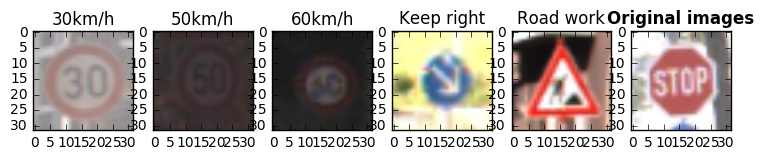

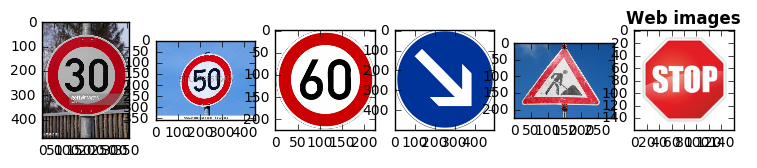

In [7]:
# Do Not Re-rerun this code as they are Original Images and new web images are plotted here

new_labels = np.array([1,2,3,38,25,14])  

col_nbr = 6
row_nbr = 1

col_size = 1.5
row_size = 1.5

fig, ax = plt.subplots(row_nbr,col_nbr, sharex=True,  figsize=(col_nbr*col_size, row_nbr*row_size))
plt.subplot(1,6,1),plt.imshow(X_train[y_train == 1][0], cmap='gray'),plt.title('30km/h');
plt.subplot(1,6,2),plt.imshow(X_train[y_train == 2][0], cmap='gray'),plt.title('50km/h');
plt.subplot(1,6,3),plt.imshow(X_train[y_train == 3][0], cmap='gray'),plt.title('60km/h');
plt.subplot(1,6,4),plt.imshow(X_train[y_train == 38][0], cmap='gray'),plt.title('Keep right');
plt.subplot(1,6,5),plt.imshow(X_train[y_train == 25][0], cmap='gray'),plt.title('Road work');
plt.subplot(1,6,6),plt.imshow(X_train[y_train == 14][0], cmap='gray'),plt.title('Stop');
plt.title('Original images', fontsize=12, fontweight='bold')    
plt.show()



images = os.listdir("web_images/")
fig = plt.figure(figsize=(20, 8))
web_images = [] 

for idx,img in enumerate(images):
    image = mpimg.imread('web_images/' + images[idx])
    web_images.append(image)

# Create subplots in figure
fig, ax = plt.subplots(row_nbr,col_nbr, sharex=True,  figsize=(col_nbr*col_size, row_nbr*row_size))
for i in range(1,len(web_images)+1):
    plt.subplot(1,6,i)
    plt.imshow(web_images[i-1])
#     ax.set_xticks([])
#     ax.set_yticks([])
plt.title('Web images', fontsize=12, fontweight='bold')    
plt.show()

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

The model is not performing equally well on captured images when compared to testing on the dataset.It appears the model is overfitting as the accuracy on the captured images is 50% against 97.5% validation and 91.7 testing accuracy. 

Off 6 images,the model correctly predicts 3 of them.The model has failed to predict high contrast bright images.Though grayscaled image provides faster execution,the model trained with RGB images can rather provide a better accuracy on certain types of images. 


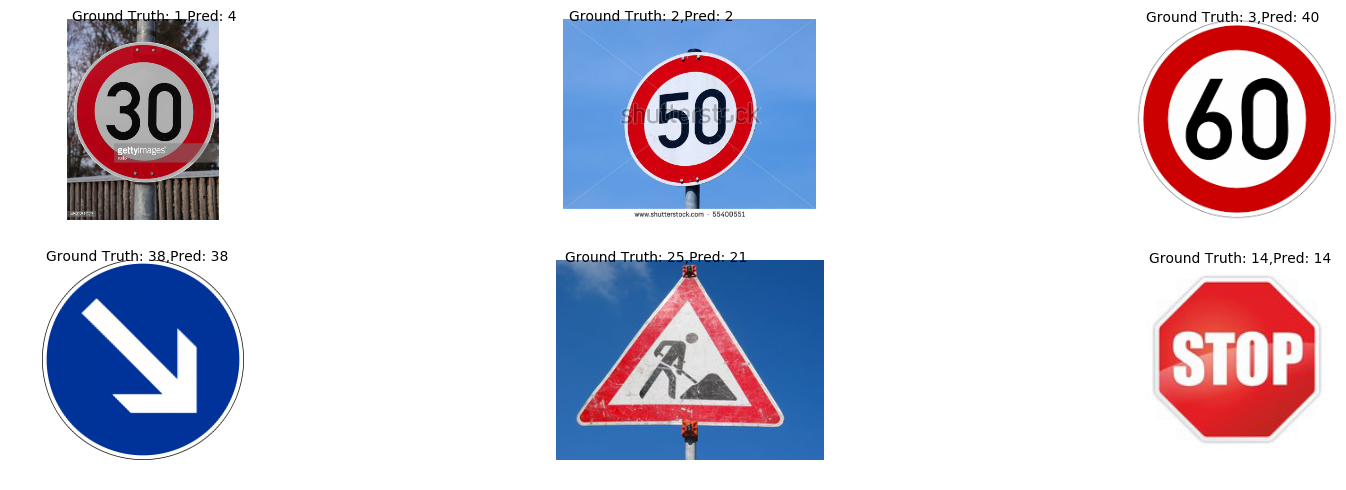

In [22]:
fig = plt.figure(figsize=(20, 15))
for i in range(len(predictions)):
    ground_truth = new_labels[i]
    prediction = labels[i]
    plt.subplot(5, 3, 1+i)
    plt.axis('off')
    plt.text(10,1, "Ground Truth: {0},Pred: {1}".format(ground_truth, prediction),fontsize=10)
    plt.imshow(web_images[i])

In [20]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

for nbr, prob in enumerate(softmax_probabilities.values):
    print (nbr,prob)


0 [  1.00000000e+00   7.58034721e-14   0.00000000e+00]
1 [ 1.  0.  0.]
2 [ 1.  0.  0.]
3 [ 1.  0.  0.]
4 [  1.00000000e+00   1.67901276e-33   0.00000000e+00]
5 [ 1.  0.  0.]


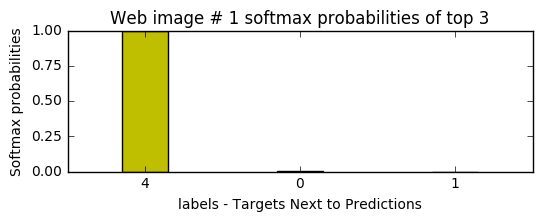

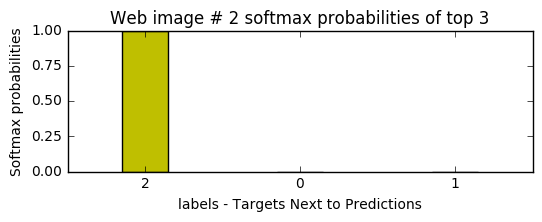

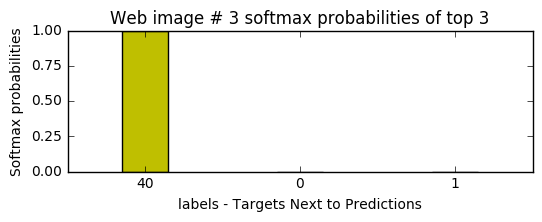

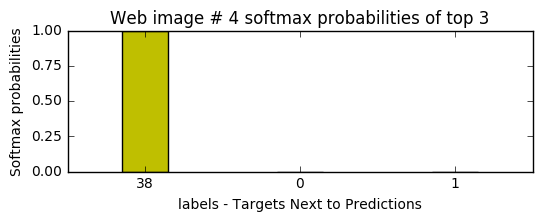

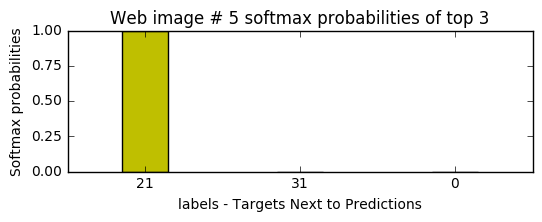

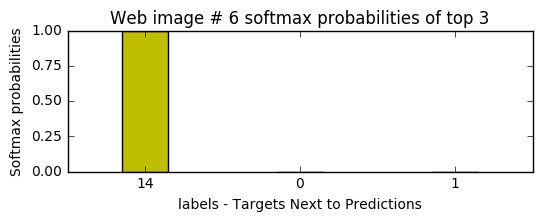

In [21]:
for nbr, prob in enumerate(softmax_probabilities.values):
    fig = plt.figure()
    ax = fig.add_subplot(2,1,2)
    plt.bar(np.arange(3), prob, 0.3, color='y', align='center')
    plt.ylabel('Softmax probabilities')
    plt.title("Web image # {} softmax probabilities of top 3".format(nbr+1))
    plt.xticks(np.arange(3))
    plt.yticks(np.arange(0, 1.1, .25))
    ax.set_xticklabels(softmax_probabilities.indices[nbr])
    plt.xlabel('labels - Targets Next to Predictions')
    plt.show()  

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

Predicted labels : [ 4  2 40 38 21 14] 

Actual labels    : [ 1  2  3 38 25 14]

The 3 largest softmax probabilities of the images show the model was certain for images # 2,4,6.
That also shows the trained model has failed to predict correct class labels for images # 1,3,5 and the correct predictions do not appear in the top 3 prediction rank. 

It appears that the model has not been generalized enough to predict a correct class for any shapes or colors unseen traffic images.This might be due to as a result of the model trained on imbalanced distribution of classes which requirs generating additional data or data augmentation,image transformation for low contrast images during training phase.It will be interesting to see if we train the model by including these six new images,and whether the model can predict with the same 91.7% test accuracy.


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.